In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from sklearn.metrics import classification_report
import tensorflow.keras.datasets.cifar10
import numpy as np
import matplotlib.pyplot as plt

## data preparation 

load the data and asign it to the train and test variables

In [2]:
(X_train, y_train), (X_test, y_test) = tensorflow.keras.datasets.cifar10.load_data()

print the shapes of X and y

In [3]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape:  {X_test.shape}, y_test shape:  {y_test.shape}")

X_train shape: (50000, 32, 32, 3), y_train shape: (50000, 1)
X_test shape:  (10000, 32, 32, 3), y_test shape:  (10000, 1)


reshapes y_train and y_test so it's 1 array instead of an array of lists with 1 item

In [4]:
print(y_test[:5])

[[3]
 [8]
 [8]
 [0]
 [6]]


In [5]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [6]:
print(y_test[:5])

[3 8 8 0 6]


print the shapes of X and y

In [7]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape:  {X_test.shape}, y_test shape:  {y_test.shape}")

X_train shape: (50000, 32, 32, 3), y_train shape: (50000,)
X_test shape:  (10000, 32, 32, 3), y_test shape:  (10000,)


creates a list of class names

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

## the first convolutional neural network

creates a CNN named cnn1.

In cnn1 i use multiple Conv2D layers the first one takes the input shape of the images 32x32 and 3 colors,
the rest just take the input from the layer above.

For all of them i use the "leaky_relu" activation function as using most other activation functions gave worse results.

I use padding="same" for all of them to keep the output the same shape as the input.

Inbetween the Conv2D layers i use a MaxPooling2D layer to reduce the overall parameters and highlight the more important features that the Conv2D layer found.

In [9]:
cnn1 = Sequential([
    layers.Conv2D(64, (3,3), activation='leaky_relu', padding="same", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation="leaky_relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3,3), activation="leaky_relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation = "relu"),
    layers.Dense(10, activation="softmax")])

In [10]:
cnn1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
cnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          36896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)         0

In [12]:
history1 = cnn1.fit(X_train, y_train, epochs=10, validation_data = (X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.8158 - accuracy: 0.4055 - val_loss: 1.4328 - val_accuracy: 0.4967
Epoch 2/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.3052 - accuracy: 0.5381 - val_loss: 1.2575 - val_accuracy: 0.5552
Epoch 3/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.1456 - accuracy: 0.5995 - val_loss: 1.1820 - val_accuracy: 0.5880
Epoch 4/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.0630 - accuracy: 0.6295 - val_loss: 1.1548 - val_accuracy: 0.6124
Epoch 5/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9852 - accuracy: 0.6564 - val_loss: 1.0572 - val_accuracy: 0.6354
Epoch 6/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.9304 - accuracy: 0.6785 - val_loss: 1.0148 - val_accuracy: 0.6654
Epoch 7/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.8794 - accuracy: 0.6934 - val_loss: 0.9831 -

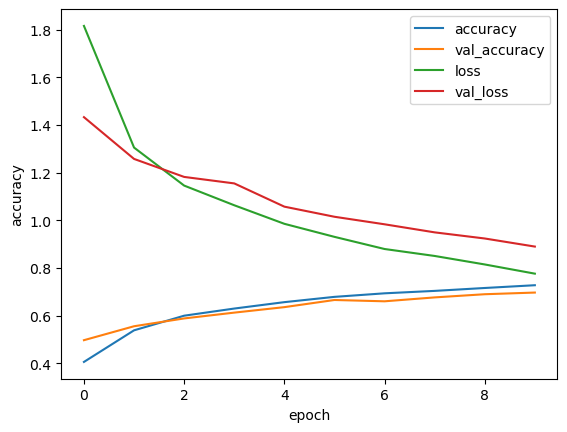

In [13]:
plt.plot(history1.history["accuracy"], label="accuracy")
plt.plot(history1.history["val_accuracy"], label="val_accuracy")
plt.plot(history1.history["loss"], label="loss")
plt.plot(history1.history["val_loss"], label="val_loss")
plt.legend(["accuracy", "val_accuracy", "loss", "val_loss"], loc="upper right")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [14]:
y_percent = cnn1.predict(X_test)
y_percent_sample = np.argmax(y_percent, axis=1)
print(classification_report(y_test, y_percent_sample))

313/313 [==============================] - 2s 8ms/step
              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1000
           1       0.87      0.82      0.84      1000
           2       0.70      0.48      0.57      1000
           3       0.53      0.42      0.47      1000
           4       0.56      0.74      0.64      1000
           5       0.52      0.69      0.59      1000
           6       0.74      0.77      0.75      1000
           7       0.80      0.70      0.75      1000
           8       0.81      0.80      0.81      1000
           9       0.81      0.80      0.80      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [15]:
y_pred = cnn1.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

313/313 [==============================] - 2s 8ms/step


## normalization

normalize the X data from: between 0 and 255, to between 0 and 1

In [16]:
print(X_train[0][0][0])

[59 62 63]


In [17]:
X_train = X_train/255
X_test = X_test/255

In [18]:
print(X_train[0][0][0])

[0.23137255 0.24313725 0.24705882]


## the second convolutional neural network

For the second model i looked into a few of the additional techniques: dropout, regularization, weight decay and a different loss function, but i didn't really see any quantifiable improvement in the model for most of these.

At most i got the second model around 75% but the first one also got that with some of the runs.

Eventhough it took quite a bit longer to train.

In [19]:
cnn2 = Sequential([
    layers.Conv2D(64, (3,3), activation='leaky_relu', padding="same", 
                  input_shape=(32,32,3), kernel_initializer='glorot_uniform'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Conv2D(128, (3,3), activation="leaky_relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(32, (3,3), activation="leaky_relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(64, activation = "leaky_relu"),
    layers.Dense(10, activation="softmax")])

In [20]:
cnn2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
cnn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 128)        

In [22]:
history2 = cnn2.fit(X_train, y_train, epochs=10, validation_data = (X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.6008 - accuracy: 0.4120 - val_loss: 1.2789 - val_accuracy: 0.5420
Epoch 2/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.2454 - accuracy: 0.5522 - val_loss: 1.1526 - val_accuracy: 0.5905
Epoch 3/10
1563/1563 [==============================] - 52s 34ms/step - loss: 1.1229 - accuracy: 0.5995 - val_loss: 0.9818 - val_accuracy: 0.6532
Epoch 4/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.0402 - accuracy: 0.6310 - val_loss: 0.9887 - val_accuracy: 0.6495
Epoch 5/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9803 - accuracy: 0.6525 - val_loss: 0.8726 - val_accuracy: 0.6937
Epoch 6/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9368 - accuracy: 0.6677 - val_loss: 0.8515 - val_accuracy: 0.7019
Epoch 7/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.9101 - accuracy: 0.6778 - val_loss: 0.8293 -

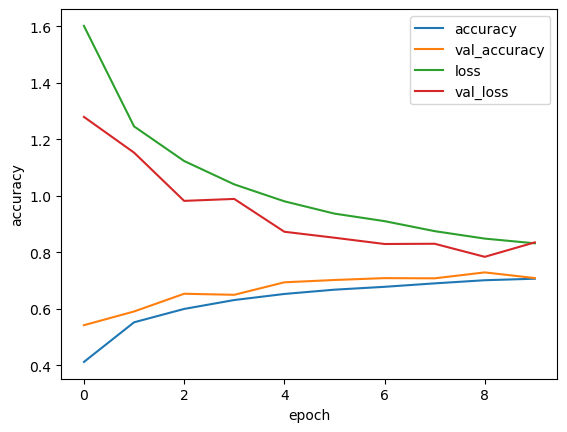

In [23]:
plt.plot(history2.history["accuracy"], label="accuracy")
plt.plot(history2.history["val_accuracy"], label="val_accuracy")
plt.plot(history2.history["loss"], label="loss")
plt.plot(history2.history["val_loss"], label="val_loss")
plt.legend(["accuracy", "val_accuracy", "loss", "val_loss"], loc="upper right")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [24]:
y_percent = cnn2.predict(X_test)
y_percent_sample = np.argmax(y_percent, axis=1)
print(classification_report(y_test, y_percent_sample))

313/313 [==============================] - 3s 8ms/step
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1000
           1       0.73      0.95      0.82      1000
           2       0.57      0.62      0.59      1000
           3       0.60      0.37      0.46      1000
           4       0.70      0.66      0.68      1000
           5       0.75      0.48      0.58      1000
           6       0.60      0.91      0.73      1000
           7       0.82      0.72      0.77      1000
           8       0.81      0.86      0.84      1000
           9       0.83      0.74      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000



In [33]:
y_pred = cnn2.predict(X_test)

313/313 [==============================] - 2s 8ms/step


In [34]:
y_classes = [np.argmax(i) for i in y_pred]
y_classes[:15]

[3, 1, 8, 8, 6, 6, 1, 6, 3, 1, 0, 9, 4, 7, 9]

In [35]:
y_test[:15]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9], dtype=uint8)

In [38]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

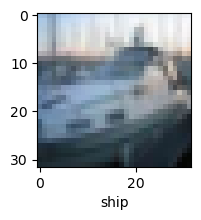

In [40]:
plot_sample(X_test, y_test, 2)